# Actividad: Optimización basada en gradiente: Aplicación básica

Declaración de la función a optimizar

La función que se optimizará es: $y = f(x)= -x^{3}+x^{2}+x$

El intervalo en el que se hará la optimización es $[-1,2]$

La dirección de la optimización será minimización

Cargado de librerías

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Gráfico de la función

In [2]:
#Generar los valores de x
x = np.arange(-1, 2.1, 0.1)
#Generar los valores de y
y = -x**3 + x**2 + x

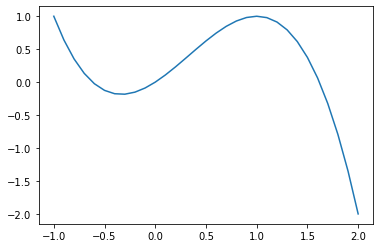

In [3]:
#Plottear los puntos
plt.plot(x, y)
#Explicitar que se muestra el gráfico
plt.show();

Cálculo de la derivada de la función

La derivada de la función es: $y' = f'(x) = -3x^{2}+2x+1$

Gráfico de la derivada de la función

In [4]:
y_prima = -3*x**2 + 2*x + 1

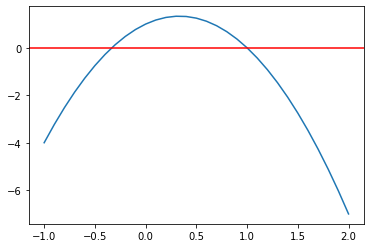

In [5]:
#Plottear los puntos
plt.plot(x, y_prima)
#Línea en y=0
plt.axhline(y=0, color='r', linestyle='-')
#Explicitar que se muestra el gráfico
plt.show();

Construcción de dos funciones que calculen f(x) y f'(x) para cualquier x

In [6]:
def f(x):
    return -x**3 + x**2 + x

def fprima(x):
    return -3*x**2 + 2*x + 1

Una iteración de manera manual

Sea $x0 = 0.5$ el punto inicial

In [7]:
x0 = 0.5

Cálculo de $y0=f(x0)$

In [8]:
y0 = f(x0)
y0

0.625

Cálculo de la derivada de $f$ en $x0$

In [9]:
yprima0 = fprima(x0)
yprima0

1.25

Gráfico de la función y su gradiente en $x0$

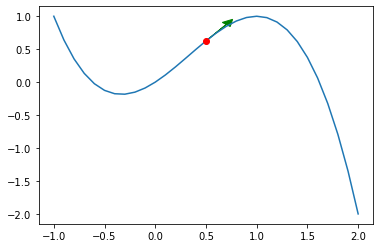

In [10]:
#Plottear los puntos
plt.plot(x, y)
#Plottear el punto inicial
plt.plot(x0, y0, 'ro')
#Plottear el vector gradiente
plt.arrow(x0, y0, 0.2, yprima0*0.2, head_width=0.1, head_length=0.1, linewidth=1, color='g')
#Explicitar que se muestra el gráfico
plt.show();

Calcular el punto $x1$ con base en $x0$, en el gradiente y en un tamaño de paso dado $\Delta$

Sea $s0$ el gradiente en $x0$, dividido por su magnitud

In [11]:
s0 = yprima0 / abs(yprima0)

In [12]:
delta = 0.1

La ecuación general para calcular $x1$ es: $x1 = x0 + \Delta s0 $

Como se trata de un problema de minimización, debemos restar el término $\Delta s0$

Por tanto, la ecuación que debemos considerar es: $x1$ es: $x1 = x0 - \Delta s0 $

In [13]:
x1 = x0 - delta * s0
x1

0.4

Calculemos $f(x1)$

In [14]:
f(x1)

0.49600000000000005

Comparemos $f(x0)$ con $f(x1)$ para verificar el cambio en el valor de $f(x)$

In [15]:
tabla = pd.DataFrame([f(x0),f(x1)],index=[x0,x1],columns=['f(x)'])
tabla

,f(x)
0.5,0.625
0.4,0.496


Algoritmo general

In [16]:
#Setear solución semilla
x_it=0.5
#Setear número de iteraciones total
n=30
delta = 0.05
#Iteración actual
k=1
#Guardar x en el vector de la solución
solucion=[]
solucion.append(x_it)
while k<= n:
    #Calcular la derivada de f en x
    yprima_iteracion = fprima(x_it)
    #Calcular s
    s = yprima_iteracion / abs(yprima_iteracion)
    #Calcular el nuevo x
    if x_it - delta*s >=-1 and x_it - delta*s <=2:
        x_it = x_it - delta*s
    elif x_it - delta*s <-1:
        x_it =-1
    else:
        x_it = 2
    #Guardar el valor de x obtenido
    solucion.append(x_it)
    k=k+1

Ver los valores de x conseguidos

In [17]:
solucion

[0.5,
 0.45,
 0.4,
 0.35000000000000003,
 0.30000000000000004,
 0.25000000000000006,
 0.20000000000000007,
 0.15000000000000008,
 0.10000000000000007,
 0.05000000000000007,
 6.938893903907228e-17,
 -0.04999999999999993,
 -0.09999999999999994,
 -0.14999999999999994,
 -0.19999999999999996,
 -0.24999999999999994,
 -0.29999999999999993,
 -0.3499999999999999,
 -0.29999999999999993,
 -0.3499999999999999,
 -0.29999999999999993,
 -0.3499999999999999,
 -0.29999999999999993,
 -0.3499999999999999,
 -0.29999999999999993,
 -0.3499999999999999,
 -0.29999999999999993,
 -0.3499999999999999,
 -0.29999999999999993,
 -0.3499999999999999,
 -0.29999999999999993]

Calcular los valores de y asociados a cada solución obtenida

In [18]:
y_solucion = [f(i) for i in solucion]
y_solucion

[0.625,
 0.561375,
 0.49600000000000005,
 0.42962500000000003,
 0.36300000000000004,
 0.29687500000000006,
 0.2320000000000001,
 0.16912500000000008,
 0.10900000000000008,
 0.05237500000000008,
 6.938893903907228e-17,
 -0.04737499999999994,
 -0.08899999999999995,
 -0.12412499999999996,
 -0.15199999999999997,
 -0.171875,
 -0.183,
 -0.184625,
 -0.183,
 -0.184625,
 -0.183,
 -0.184625,
 -0.183,
 -0.184625,
 -0.183,
 -0.184625,
 -0.183,
 -0.184625,
 -0.183,
 -0.184625,
 -0.183]

Graficar las soluciones obtenidas iterativamente

Calcular $x^{*}$ y $f(x^{*})$

In [19]:
x_optimo = x_it
y_optimo= f(x_optimo)

In [20]:
print("El valor mínimo de f es ", y_optimo , "y se alcanza en x=" , x_optimo)

El valor mínimo de f es  -0.183 y se alcanza en x= -0.29999999999999993


Graficar todas las soluciones obtenidas

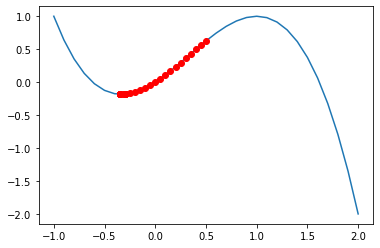

In [21]:
#Plottear los puntos
plt.plot(x, y)
#Plottear todos los puntos encontrados
plt.plot(solucion,y_solucion,'ro')
#Explicitar que se muestra el gráfico
plt.show()